In [1]:
import pandas as pd
import numpy as np

from numpy import average


#import the csv to pandas
file_path='/home/itay/salarySurvey/data/combined_survey_filtered_wout_outliers.xlsx'
df =pd.read_excel(file_path)



In [2]:
# enter the coulmns names as varibels:

salary='שכר שעתי במשרת הסטודנט הראשונה (ש"ח לשעה)'
grade='ממוצע (נכון לתקופת חיפוש העבודה)'
bargin='האם התמקחת אחרי קבלת ההצעה?'
gender='מין'
year='שנת הצעת העבודה'
company='חברה (נא לכתוב באנגלית את שם החברה)'
courses='קורסי מפתח שעשית לפני הצעת העבודה'
exp='האם היה לך ניסיון לפני קבלת המשרה?'
sem='באיזה סמסטר היית כשקיבלת את ההצעה?'

ice_cream='טעם גלידה אהוב'

rounding_density=2

In [3]:
#cleanup to the data, you should add your own cleanup to the data:
#df=df.drop(65)
#df=df.drop(82)
#df=df.drop(104)
#df=df.drop(117)
#
#df[df[salary].str.contains("50K",na=False)]
#df=df.drop(102)
#
#df[df[salary]=='20']
#df=df.drop(148)
#
#df[df[grade].str.contains(" תואר ראשון",na=False)]
#df=df.drop(115)



In [4]:
av_df=df[salary].astype(float).sum()/len(df)
av_df

94.15186246418338

In [5]:
#calculate the average value of columnName column in df:
def calculate_average(df,column_name):
    num_of_rows=len(df)
    sum_of_rows=df[column_name].astype(float).sum()
    return sum_of_rows/num_of_rows # return the average value

def calculate_precentage_of_binary_answer(df,column_name,binary_field_answer):
    return len(df[df[column_name]==binary_field_answer])/ len(df)

def create_sorted_average_dict(dict,field):
    average_dict={}
    sorted_dict={}
    #calculate the average:
    for name in dict:
        average_dict[name]=calculate_average(dict[name],field)

    #sort:
    sorted_salary_list=sorted(average_dict.items(), key=lambda x: x[1])

    for tup in sorted_salary_list:
        average_rounded=round(tup[1],rounding_density)
        new_key= tup[0]+" "+str(average_rounded)
        sorted_dict[new_key]=tup[1] 
    return sorted_dict

In [23]:
#calculate average salary and grades:
from scipy.stats import ttest_ind

male_df= df.loc[df[gender]=='זכר']
female_df= df.loc[df['מין']=='נקבה']

average_salary_male = calculate_average(male_df,salary)
average_grade_male = calculate_average(male_df,grade)

average_salary_female = calculate_average(female_df,salary)
average_grade_female = calculate_average(female_df,grade)

print(average_salary_male)
print(average_grade_male)
print(average_salary_female)
print(average_grade_female)

print('num of mens:' +str(len(male_df)))
print('num of females:' +str(len(female_df)))

res = ttest_ind(male_df[salary], female_df[salary])

print(res)



95.03625954198473
84.42404580152672
92.46296296296296
83.09876543209876
num of mens:262
num of females:81


In [30]:
#bargin presentage:

precents_of_male_bargin=calculate_precentage_of_binary_answer(male_df,bargin,'כן')
precents_of_female_bargin=calculate_precentage_of_binary_answer(female_df,bargin,'כן')

bargin_m=male_df[male_df[bargin]=='כן']
n_bargin_m=male_df[male_df[bargin]=='לא']
bargin_f=female_df[female_df[bargin]=='כן']
n_bargin_f=female_df[female_df[bargin]=='לא']


print("bargin man avreage salary: "+str(calculate_average( bargin_m,salary))+ '   Amount:'+str(len(bargin_m)))
print("didn't bargin man avreage salary: "+str(calculate_average( n_bargin_m,salary))+ '   Amount:'+str(len(n_bargin_m)))
print("bargin woman avreage salary: "+str(calculate_average( bargin_f,salary))+ '   Amount:'+str(len(bargin_f)))
print("didn't bargin woman avreage salary: "+ str(calculate_average( n_bargin_f,salary))+ '   Amount:'+str(len(n_bargin_f)))


bargin man avreage salary: 94.12264150943396   Amount:53
didn't bargin man avreage salary: 95.61463414634146   Amount:205
bargin woman avreage salary: 85.71923076923076   Amount:26
didn't bargin woman avreage salary: 95.39245283018869   Amount:53


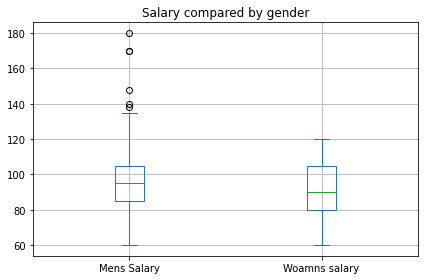

In [8]:
import matplotlib.pyplot as plt
man_salarys=male_df[[salary]].astype(float)
fman_salarys=female_df[[salary]].astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
combined_dfs = pd.DataFrame({"Mens Salary": male_df[salary].astype(float), "Woamns salary": female_df[salary].astype(float)})

# Plot the dataframe
ax = combined_dfs[['Mens Salary', 'Woamns salary']].plot(kind='box',grid=True,title='Salary compared by gender')

# Display the plot
plt.show()

In [9]:
#get outliers cleaned for the scatter point:
scatter_df=df
scatter_df[scatter_df[salary]>160]
scatter_df=scatter_df.drop(344)
scatter_df=scatter_df.drop(345)
scatter_df=scatter_df.drop(346)
scatter_df=scatter_df.drop(347)
scatter_df[scatter_df[salary]<59]
#scatter_df=scatter_df.drop(0)
#scatter_df=scatter_df.drop(1)

,Timestamp,מסלול לימודים,באיזה סמסטר היית כשקיבלת את ההצעה?,ממוצע (נכון לתקופת חיפוש העבודה),האם ביקשו גיליון ציונים?,קורסי מפתח שעשית לפני הצעת העבודה,האם היה לך ניסיון לפני קבלת המשרה?,"שכר שעתי במשרת הסטודנט הראשונה (ש""ח לשעה)",האם התמקחת אחרי קבלת ההצעה?,חברה (נא לכתוב באנגלית את שם החברה),תחום המשרה,מין,טעם גלידה אהוב,שנת הצעת העבודה


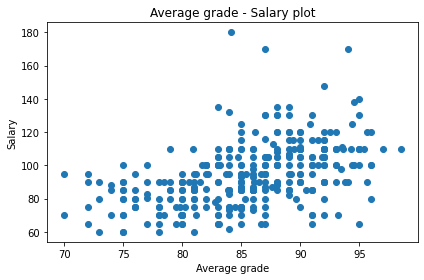

In [10]:
#prepare the scatter points:
x=scatter_df[grade].astype(float)
y=scatter_df[salary].astype(float)
plt.scatter(x,y)
plt.title("Average grade - Salary plot")
plt.xlabel("Average grade")
plt.ylabel("Salary")
plt.show()

In [11]:
#calculate num of exmples from each company:
temp_df=df
num_of_examples={}
companies_names=['Intel','Microsoft','Amazon','Google','Facebook','Apple','IBM','Rafael','Elbit','Plus500','Nvidia','Mobileye']
for company_name in companies_names:
        num_of_examples[company_name]=len(temp_df[temp_df[company]==company_name])
print(num_of_examples)


{'Intel': 81, 'Microsoft': 20, 'Amazon': 22, 'Google': 2, 'Facebook': 4, 'Apple': 12, 'IBM': 11, 'Rafael': 40, 'Elbit': 15, 'Plus500': 2, 'Nvidia': 13, 'Mobileye': 9}


In [12]:
#get the calculate companies average:

from cmath import nan


companies_dict={}
companies_names=['Intel','Microsoft','Amazon','Facebook','Apple','IBM','Rafael','Elbit','Nvidia','Mobileye']

for company_name in companies_names:
    companies_dict[company_name]=df[df[company]==company_name]

In [13]:

sorted_salaries_companies=create_sorted_average_dict(companies_dict,salary)


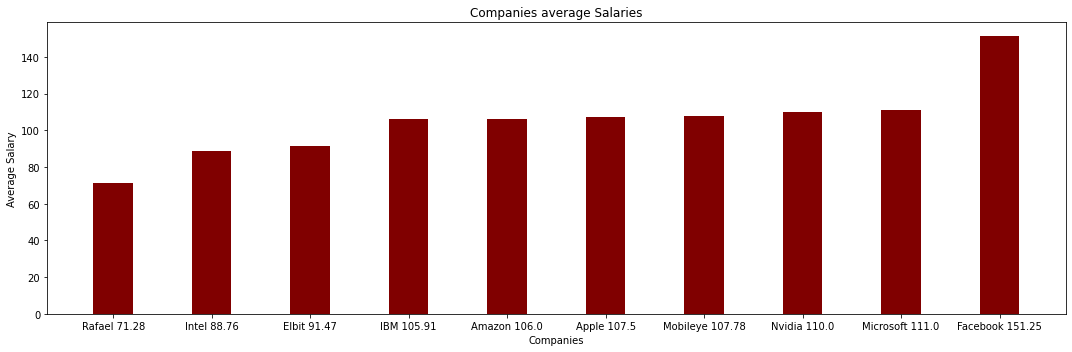

In [14]:
fig=plt.figure(figsize=(15,5))
plt.bar(sorted_salaries_companies.keys(), sorted_salaries_companies.values(), color ='maroon',
        width = 0.4)
 
plt.xlabel("Companies")
plt.ylabel("Average Salary")
plt.title("Companies average Salaries")
plt.show()


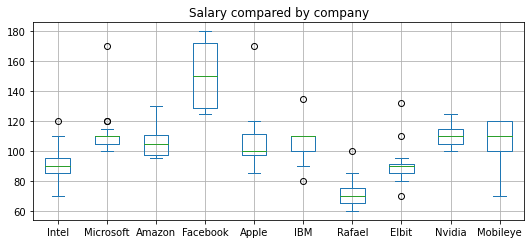

In [15]:
# box plot by company:

import matplotlib.pyplot as plt

for current_company in companies_dict:
    current_df=companies_dict[current_company]
    companies_dict[current_company]=(current_df[salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
#combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
combined_dfs=pd.DataFrame(companies_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True,title='Salary compared by company')

# Display the plot
plt.show()

In [16]:
ice_cream_df_dict={}
ice_ceam_names=['בייגלה מלוח - קרמל','פיסטוק','וניל עוגיות','בצק עוגיות','שוקולד בראוניס']

for ice_cream_name in ice_ceam_names:
    ice_cream_df_dict[ice_cream_name]=df[df[ice_cream]==ice_cream_name]    

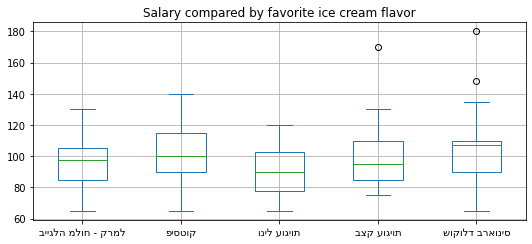

In [17]:
import matplotlib.pyplot as plt


for flavor in ice_cream_df_dict:
    c_df=ice_cream_df_dict[flavor]
    ice_cream_df_dict[flavor]=(c_df[salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
#combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
combined_dfs=pd.DataFrame(ice_cream_df_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True,title='Salary compared by favorite ice cream flavor')

# Display the plot
plt.show()

In [18]:
sorted_salaries_companies=create_sorted_average_dict(ice_cream_df_dict,salary)


KeyError: 'שכר שעתי במשרת הסטודנט הראשונה (ש"ח לשעה)'

In [ ]:
print(sorted_salaries_companies)

{'למרק - חולמ הלגייבnan': nan, 'פיסטוק73.76': 73.76190476190476, 'וניל עוגיות77.85': 77.84782608695652, 'שוקולד בראוניס78.79': 78.79310344827586, 'בצק עוגיות83.37': 83.37307692307692}


In [ ]:
mtm='מת"מ'
mivni='מבני נתונים'
operation_s='הפעלה'
algo='אלגו'

df_by_courses={}
courses_names=[mtm,mivni,operation_s,algo]

for course in courses_names:
    df_by_courses[course] = df.loc[df[courses].str.contains(course,na=False)]

/home/itay/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


{'מת"מ 93.22': 93.21943573667711,
 'מבני נתונים 93.77': 93.76975945017182,
 'הפעלה 94.03': 94.03132530120483,
 'אלגו 94.08': 94.07674418604651,
 'קורס בחירה הקשור לתחום (מבוא ללומדות / הגנה ברשתות ..) nan': nan}

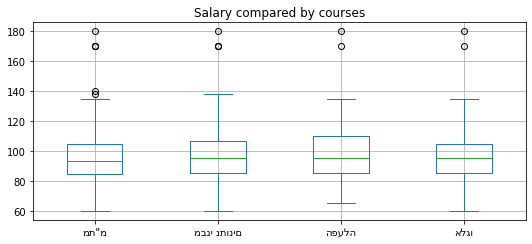

In [ ]:
courses_average_dict = create_sorted_average_dict(dict=df_by_courses,field= salary)

courses_dict={}

for course in courses_names:
    courses_dict[course]=(df.loc[df[courses].str.contains(course,na=False)][salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
#combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
combined_dfs=pd.DataFrame(courses_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True,title='Salary compared by courses')

# Display the plot
plt.show()

In [ ]:
courses_average_dict = create_sorted_average_dict(dict=df_by_courses,field= salary)
print(courses_average_dict)


{'מת"מ 94.75': 94.74698795180723, 'אלגו 95.48': 95.47897727272726, 'מבני נתונים 95.5': 95.49668874172185, 'הפעלה 96.0': 96.00176470588235}


{'מת"מ 93.96': 93.95977443609023, 'מבני נתונים 94.82': 94.81902834008096, 'אלגו 95.57': 95.57152777777777, 'הפעלה 95.99': 95.98768115942029}


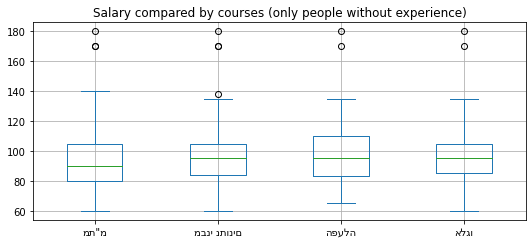

In [ ]:
no_exp='ללא ניסיון כלל'
no_exp_df=df[df[exp]==no_exp]

no_exp_courses_dict={}

for key in df_by_courses:
    current_course_df=df_by_courses[key]
    no_exp_courses_dict[key] = current_course_df[current_course_df[exp]==no_exp]


courses_noexp_average_dict = create_sorted_average_dict(dict=no_exp_courses_dict,field= salary)
print(courses_noexp_average_dict)

for course in courses_names:
    courses_dict[course]=(no_exp_df.loc[no_exp_df[courses].str.contains(course,na=False)][salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
#combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
combined_dfs=pd.DataFrame(courses_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True,title='Salary compared by courses (only people without experience)')

# Display the plot
plt.show()

{'מת"מ 93.96': 93.95977443609023, 'מבני נתונים 94.82': 94.81902834008096, 'אלגו 95.57': 95.57152777777777, 'הפעלה 95.99': 95.98768115942029}


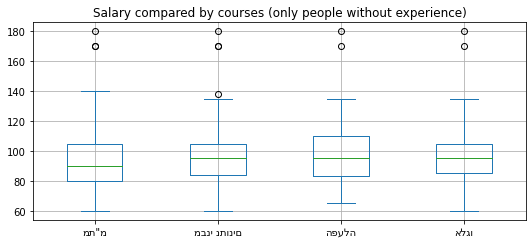

In [ ]:
no_exp='ללא ניסיון כלל'
no_exp_df=df[df[exp]==no_exp]

no_exp_courses_dict={}

for key in df_by_courses:
    current_course_df=df_by_courses[key]
    no_exp_courses_dict[key] = current_course_df[current_course_df[exp]==no_exp]


courses_noexp_average_dict = create_sorted_average_dict(dict=no_exp_courses_dict,field= salary)
print(courses_noexp_average_dict)

for course in courses_names:
    courses_dict[course]=(no_exp_df.loc[no_exp_df[courses].str.contains(course,na=False)][salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
#combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
combined_dfs=pd.DataFrame(courses_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True,title='Salary compared by courses (only people without experience)')

# Display the plot
plt.show()

In [ ]:
def checkBySemster(semester_num):
    #sem5 no exp
    semster=semester_num
    sem_df=no_exp_df[no_exp_df[sem]==semster]

    sem5_courses_dict={}

    for key in df_by_courses:
        current_course_df=df_by_courses[key]
        sem5_courses_dict[key] = current_course_df[current_course_df[exp]==semster]


    sem_average_dict = create_sorted_average_dict(dict=sem5_courses_dict,field= salary)
    print(sem_average_dict)

    for course in courses_names:
        courses_dict[course]=(sem_df.loc[sem_df[courses].str.contains(course,na=False)][salary]).astype(float)

    # Set the figure size
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

    # Pandas dataframe
    #combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
    combined_dfs=pd.DataFrame(courses_dict)
    # Plot the dataframe
    ax = combined_dfs.plot(kind='box',grid=True,title='Salary compared by courses (only people from semster '+str(semester_num)+' )')

    # Display the plot
    plt.show()

/home/itay/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


{'מת"מ nan': nan, 'מבני נתונים nan': nan, 'הפעלה nan': nan, 'אלגו nan': nan}


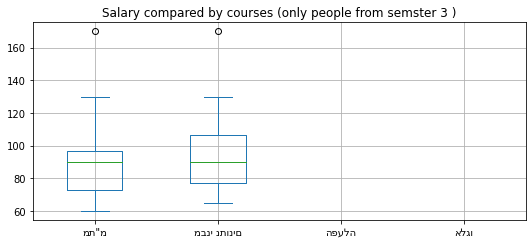

In [ ]:
#sem5 no exp
checkBySemster(3)

/home/itay/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


{'מת"מ nan': nan, 'מבני נתונים nan': nan, 'הפעלה nan': nan, 'אלגו nan': nan}


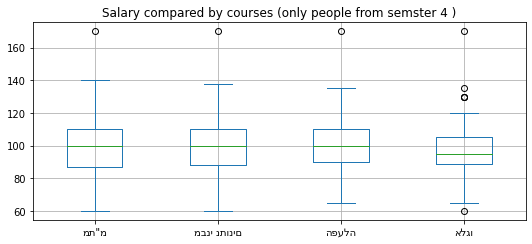

In [ ]:
checkBySemster(4)

/home/itay/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


{'מת"מ nan': nan, 'מבני נתונים nan': nan, 'הפעלה nan': nan, 'אלגו nan': nan}


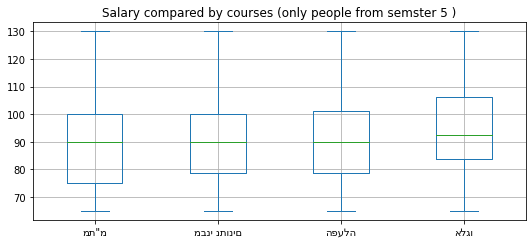

In [ ]:
checkBySemster(5)

{'מת"מ nan': nan, 'מבני נתונים nan': nan, 'הפעלה nan': nan, 'אלגו nan': nan}


/home/itay/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


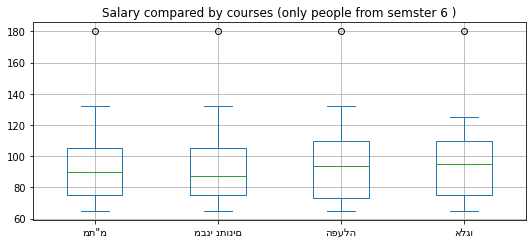

In [ ]:
checkBySemster(6)

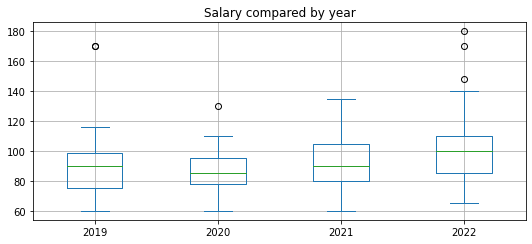

In [ ]:
dict_df_years={}
years=[2019,2020,2021,2022]

for c_year in years:
        dict_df_years[c_year]=(df[df[year]==c_year][salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
#combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
combined_dfs=pd.DataFrame(dict_df_years)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True,title='Salary compared by year')

# Display the plot
plt.show()